In [1]:
import os
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load

%matplotlib inline
plt.rc("axes.spines", top=False, right=False)

SRC_DATA_DIR = './source_data'
PR01_STAGEI_SCALES_FN = 'StageI-PR01_SCALES_SCORES_v2-hamd_vas.csv'
PR01_STAGEI_SCALES_MODEL_FN = 'StageI-PR01_Symptom_State_Clusters.joblib'

In [2]:

vas = pd.read_csv(os.path.join(SRC_DATA_DIR, PR01_STAGEI_SCALES_FN))

sel_cols = ['time (form submit)', 'vas_anxiety', 'vas_energy', 'vas_depression', 'hamd2_score', 'notes']
vas = vas[sel_cols]
vas = vas[vas.vas_depression.notnull()]
vas.rename(columns={'time (form submit)': 'timestamp'}, inplace=True)

Text(0, 0.5, 'Vas Anxiety')

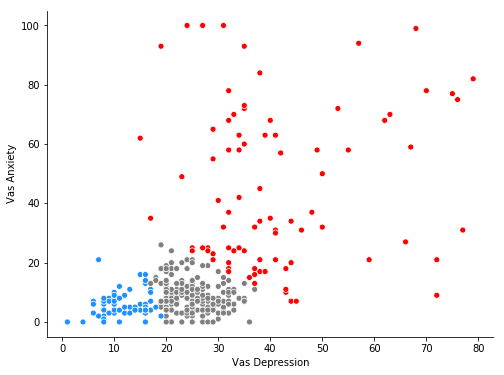

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

kmeans = KMeans(n_clusters=5)
kmeans.fit(vas[['vas_anxiety', 'vas_depression']])
dump(kmeans, os.path.join(SRC_DATA_DIR, PR01_STAGEI_SCALES_MODEL_FN))
 
vas['cluster'] = kmeans.predict(vas[['vas_anxiety', 'vas_depression']])
cluster_means = vas.groupby('cluster').apply(lambda g: g[['vas_anxiety', 'vas_depression']].mean(axis=1).mean())\
                                       .to_frame(name='means')\
                                       .sort_values('means')
vas.cluster.replace({**{cluster_means.index[0]: 0, cluster_means.index[1]: 1},
                     **{c: 2 for c in cluster_means.index[2:]}},
                    inplace=True)



sns.scatterplot(x='vas_depression', y='vas_anxiety', hue=vas.cluster, data=vas, ax=ax, 
                palette=['dodgerblue', 'gray', 'red'], legend=None);

plt.xlabel('Vas Depression')
plt.ylabel('Vas Anxiety')

In [21]:
vas[vas['cluster'] == 2]['hamd2_score'].describe()

count    49.000000
mean      8.102041
std       5.104103
min       0.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      21.000000
Name: hamd2_score, dtype: float64